# Лабораторная работа 1
## Тюльников Михаил ПИН-11М
*********
## Линейная регрессия как задача контролируемого (индуктивного) обучения

На этом занятии компьютерного практикума вы изучите линейную регрессию и получите
представление, о том, как данная процедура применяется для обработки данных. Во многих
приложениях нейронные сети реализуют регрессионные вычисления (статистический метод
исследования влияния одной или нескольких независимых переменных
$x_1$, $x_2$, ..., $x_p$ на зависимую переменную $y$) или решение задач классификации. При этом, в частности, линейная
регрессия (англ. Linear regression) представляет собой регрессионную модель зависимости одной
(объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов,
регрессоров, независимых переменных) $x$ с линейной функцией зависимости.

Прежде чем приступить, собственно к программированию, настоятельно рекомендуется
ознакомиться с материалом лекций, а также с дополнительными материалами, имеющими
отношение к задаче градиентного спуска и к области минимизации функционалов

In [4]:
# импортируем все необходимые билиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Лабораторная работа 1.1: Простая линейная регрессия

### Линейна регрессия с одной переменной
В этой части упражнения Вы реализуете линейную регрессию с одной переменной для
прогнозирования прибыли сервисного центра по обслуживанию, например, изделий бытовой
электроники. Допустим, рассматриваются кандидатуры нескольких городов для такого сервисного
центра. Сеть подобных сервисных центров уже функционирует и у Вас есть данные по прибыли в
зависимости от числа жителей города (или от количества изделий, находящихся на обслуживании
в городе). Вы бы хотели использовать эти данные с тем, чтобы понять, в каком городе открыть
дополнительный сервисный центр или спрогнозировать прибыль в зависимости от числа жителей.
Файл Service_center.csv содержит набор данных для задачи с линейной регрессией. Первый столбец
– число жителей города (количество проданных изделий бытовой электроники), второй – прибыль
центра в этом городе. Отрицательные значения прибыли означают убыток.

### Построение данных
До начала выполнения любого задания было бы полезным представить данные в графическом
виде. Для визуализации набора данных (в дальнейшем, при решении аналогичной задачи с
помощью нейронной сети, этот набор данных представляет собой обучающие данные) можно
использовать точечную диаграмму, т.к. имеется только два свойства – прибыль и население города
(количество аппаратов). Многие задачи из реальной жизни имеют большее количество свойств и
параметров, так что построить их на двумерном графике, конечно же, не удастся

## Задание 1: Отображение данных на экране

Перед началом работы у вас есть возможность выбрать формат файла, с которым вы будетет работать. Для работы с файлами формата .csv предлагается использовать библиотеку pandas. Но также вы можете загрузить данные из файла .txt с помощью функции np.loadtxt('.txt', delimiter=',' ), используя билиотеку numpy

In [2]:
df = pd.read_csv('service_center.csv')

In [3]:
df.head()

,population,profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


Реализуйте функцию plot_data с помощью библиотеки matplotlib

In [4]:
def plotData(X, y):
  '''
  Инструкция: Отобразите на графике исходные обучающие данные, используя
              команды "figure", "plot" или "scatter". Создайте подписи осей графиков,
              применяя команды "xlabel" и "ylabel". Определите, что данные
              о количестве населения и соответствующем доходе от продаж
              передаются в функцию plotData(x, y) в виде ее
              аргументов x and y
  '''
  # Ваш код здесь
  plt.scatter(X, y)
  plt.ylabel('Прибыль (10 тыс руб)')
  plt.xlabel('Число жителей города (десятки тысяч)')
  plt.show()

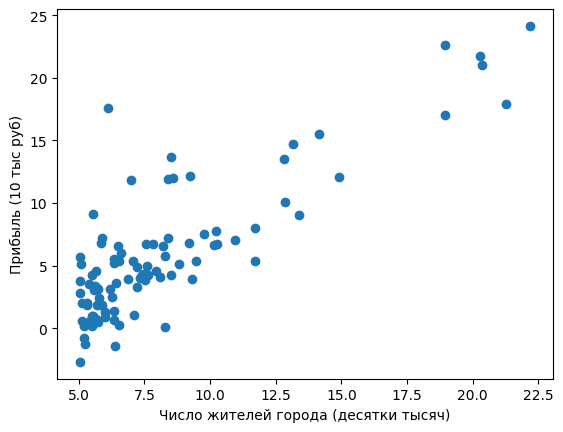

In [5]:
#строим набор наших данных
plotData(df['population'], df['profit'])

## Задание 2: Метод градиентного спуска для одной переменной

In [6]:
m = len(df) # Число элементов обучающего набора

In [7]:
X = np.stack([np.ones(m), df['population']], axis=1) # Добавляем единичный столбец к Х
y = np.array(df['profit'])
y = y.reshape((m, 1))
print(X[0:5])

[[1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]]


In [8]:
theta = np.zeros((2, 1)) # Инициализируем начальные значения
print(theta)

[[0.]
 [0.]]


Ваша задача рассчитать значение весовой функции для задачи линейной регрессии. Значение весовой функции вычисляется в зависимости от параметра theta, т.е. параметра линейной регресии, обеспечивающего соответствие значений данных (тренировочного набора) X и y.

**Cost function:**
$$
\begin{aligned}
J(θ) &= \frac{1}{2m}\sum_{i=1}^{m}\left(h_{θ}x_i - y_i\right)^2
\end{aligned}
$$


In [9]:
def computeCost(X, y, theta):
  def hFunc(x, y):
    return pow((theta[0] + theta[1] * x - y), 2)

  m = len(X)
  J = 0
  J = (sum(map(hFunc, X[:,1], y[:,0]))) / (2 * m)

  return J

В результате выполнения функции computeCost Вы должны получить стоимость равную 32.07

In [10]:
print(*computeCost(X, y, theta))

32.072733877455654


Напомним, что параметры модели, это значения $θ_j$. Именно их необходимо подобрать с целью минимизации стоимости $J(θ)$. Один из способов это сделать - использовать алгоритм наискорейшего спуска, где каждая итерация обновляет парметры модели:
$$
\begin{aligned}
θ_j &= θ_j - α\frac{1}{m}\sum_{i=1}^{m}\left(h_{θ}x_i - y_i\right)x_j^i
\end{aligned}
$$


In [11]:
def gradientDescent(X, Y, theta, alpha, num_iters):
  def thetaFunc(x, y, z):
    return (theta[0] + theta[1] * x - y) * z

  m = len(y) # number of training examples
  J_history = np.zeros((num_iters, 1))
  print(Y)

  #Сохраняйте функцию стоимости на каждой итерации
  for i in range(num_iters):
    J_history[i] = computeCost(X, Y, theta)
    theta0 = theta[0] - (alpha / m) * sum(map(thetaFunc, X[:, 1], Y[:, 0], X[:, 0]))
    theta1 = theta[1] - (alpha / m) * sum(map(thetaFunc, X[:, 1], Y[:, 0], X[:, 1]))
    theta[0] = theta0
    theta[1] = theta1


  print(theta)
  print(J_history)
  return theta, J_history

In [12]:
iterations = 2000 # Количество итераций
alpha = 0.01 #Скорость обучения
theta, J_history = gradientDescent(X, y, theta, alpha, iterations) # Выполнение градиентного спуска
theta

[[ 9.1302 ]
 [13.662  ]
 [11.854  ]
 [ 6.8233 ]
 [11.886  ]
 [ 4.3483 ]
 [12.     ]
 [ 6.5987 ]
 [ 3.8166 ]
 [ 3.2522 ]
 [15.505  ]
 [ 3.1551 ]
 [ 7.2258 ]
 [ 0.71618]
 [ 3.5129 ]
 [ 5.3048 ]
 [ 0.56077]
 [ 3.6518 ]
 [ 5.3893 ]
 [ 3.1386 ]
 [21.767  ]
 [ 4.263  ]
 [ 5.1875 ]
 [ 3.0825 ]
 [22.638  ]
 [13.501  ]
 [ 7.0467 ]
 [14.692  ]
 [24.147  ]
 [-1.22   ]
 [ 5.9966 ]
 [12.134  ]
 [ 1.8495 ]
 [ 6.5426 ]
 [ 4.5623 ]
 [ 4.1164 ]
 [ 3.3928 ]
 [10.117  ]
 [ 5.4974 ]
 [ 0.55657]
 [ 3.9115 ]
 [ 5.3854 ]
 [ 2.4406 ]
 [ 6.7318 ]
 [ 1.0463 ]
 [ 5.1337 ]
 [ 1.844  ]
 [ 8.0043 ]
 [ 1.0179 ]
 [ 6.7504 ]
 [ 1.8396 ]
 [ 4.2885 ]
 [ 4.9981 ]
 [ 1.4233 ]
 [-1.4211 ]
 [ 2.4756 ]
 [ 4.6042 ]
 [ 3.9624 ]
 [ 5.4141 ]
 [ 5.1694 ]
 [-0.74279]
 [17.929  ]
 [12.054  ]
 [17.054  ]
 [ 4.8852 ]
 [ 5.7442 ]
 [ 7.7754 ]
 [ 1.0173 ]
 [20.992  ]
 [ 6.6799 ]
 [ 4.0259 ]
 [ 1.2784 ]
 [ 3.3411 ]
 [-2.6807 ]
 [ 0.29678]
 [ 3.8845 ]
 [ 5.7014 ]
 [ 6.7526 ]
 [ 2.0576 ]
 [ 0.47953]
 [ 0.20421]
 [ 0.67861]
 [ 7.5435 ]
 [ 5

array([[-3.78806857],
       [ 1.18221277]])

In [13]:
J_history

array([[32.07273388],
       [ 6.73719046],
       [ 5.93159357],
       ...,
       [ 4.47803911],
       [ 4.47803526],
       [ 4.47803143]])

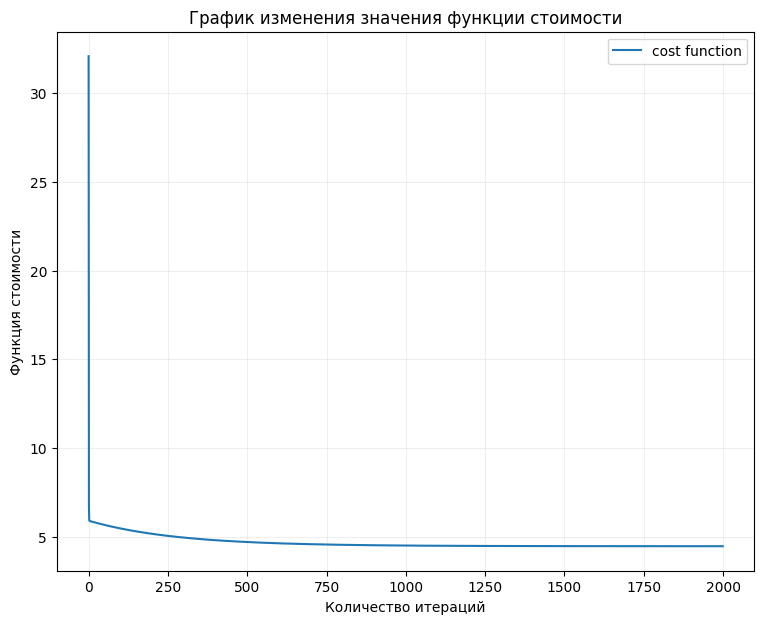

In [14]:
plt.figure(figsize=(9,7))
plt.plot(range(iterations), J_history, label="cost function")
plt.title('График изменения значения функции стоимости')
plt.xlabel('Количество итераций')
plt.ylabel('Функция стоимости')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Вы можете проверить насколько правильно ваш алгоритм нашел параметры модели с помщью библиотеки scipy. В коде ниже реализована минимизация функции стоимости с помощью данной библиотеки, методом BFGS

In [76]:
import scipy
from scipy.optimize import minimize
def f_cost(x):
    theta_0, theta_1 = x
    return (np.sum((1/(2*len(df['profit'])))*((theta_0 + df['population']*theta_1 - df['profit'])**2)))

x0 = np.array([1, 1])
result = scipy.optimize.minimize(f_cost, x0, method='BFGS')
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.476971375975186
        x: [-3.896e+00  1.193e+00]
      nit: 4
      jac: [-5.960e-08  5.960e-08]
 hess_inv: [[ 5.492e+00 -5.505e-01]
            [-5.505e-01  6.747e-02]]
     nfev: 18
     njev: 6

In [77]:
min_theta_0 = result.x[0]
min_theta_1 = result.x[1]
min_J = result.fun
print(min_theta_0, min_theta_1, min_J, sep='\n')

-3.895780635776065
1.1930336130536225
4.476971375975186


In [78]:
min_theta_0 = theta[0]
min_theta_1 = theta[1]
min_J = J_history.min()
print(*min_theta_0, *min_theta_1, min_J, sep='\n')

-3.7880685727231094
1.1822127747573767
4.478031428126645


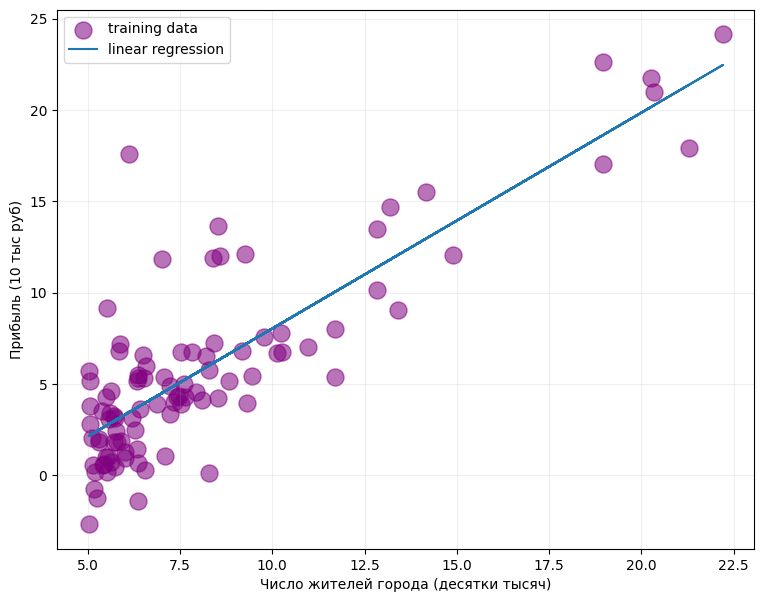

In [79]:
plt.figure(figsize=(9,7))
plt.scatter(df['population'], df['profit'], label="training data", s = 150, c='purple', marker='o',  alpha=0.55)
plt.plot(X[:,1], X.dot(theta), label="linear regression")
plt.xlabel('Число жителей города (десятки тысяч)')
plt.ylabel('Прибыль (10 тыс руб)')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Прогнозирование прибыли для количества проданных изделий 35,000 и 70,00
(грубая оценка количества жителей города)

In [80]:
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)

print('Для количества изделий = 35,000, предсказываем прибыль: {:.2f} \n'.format(*predict1*10000))
print('Для количества изделий = 70,000, предсказываем прибыль: {:.2f} \n'.format(*predict2*10000))

Для количества изделий = 35,000, предсказываем прибыль: 3496.76 

Для количества изделий = 70,000, предсказываем прибыль: 44874.21 



## Задание 3: Визуализация $J$($theta_0$, $theta_1$)

In [81]:
# Сетка, на которой рассчитывается J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

theta0_ww, theta1_ww = np.meshgrid(theta0_vals, theta1_vals)

# Инициализация J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Заполнение J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i,j] = computeCost(X, y, t)

In [82]:
w0 =  np.linspace(-10, 10, 100)
w1 =  np.linspace(-1, 4, 100)

ww0, ww1 = np.meshgrid(w0, w1)

sse = [] #Sum of Squared Errors
for j in range(len(w1)):
    sse.append([])
    for i in range(len(w0)):
         sse[j].append((1/(2*len(df['profit'])))*((ww0[j][i] + df['population']*ww1[j][i] - df['profit'])**2).sum())
sse = np.array(sse)

Если раскомментировать первую строчку следующего блока, то у вас будет возможность повернуть получившуюся поверхность и наглядно увидеть минимум. Однако, если взять и прологорифмировать функцию стоимости, то глобальный минимум функции будет виден ещё лучше. Этот минимум и есть оптимальная точка $θ_0$ и $θ_1$ к которой градиентный спуск с каждым шагом всё ближе и ближе

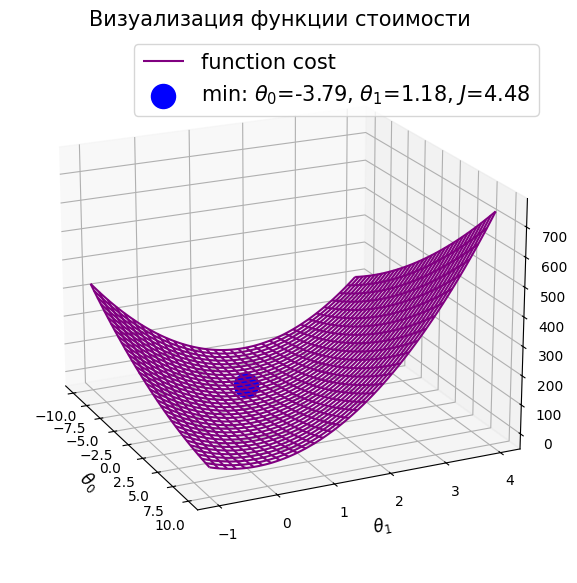

In [83]:
# %matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 335)

# ax.plot_surface(ww0, ww1, sse, cmap=plt.cm.Spectral, rstride=3, cstride=3)
ax.plot_wireframe(ww0, ww1, sse, color = 'purple', rstride=3, cstride=3, antialiased=True, label = 'function cost' )

# точка - минимум
ax.scatter(min_theta_0, min_theta_1, np.log(min_J),
    color='blue', marker='o', s=300,
    label='min: $θ_0$=%0.2f, $θ_1$=%0.2f, $J$=%0.2f' % (min_theta_0, min_theta_1, min_J))

ax.set_xlabel('$θ_0$', fontsize=12)
ax.set_ylabel('$θ_1$', fontsize=12)
ax.set_zlabel('$J$', fontsize=12)
plt.title('Визуализация функции стоимости', fontsize=15)
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.legend(fontsize=15)
plt.show()

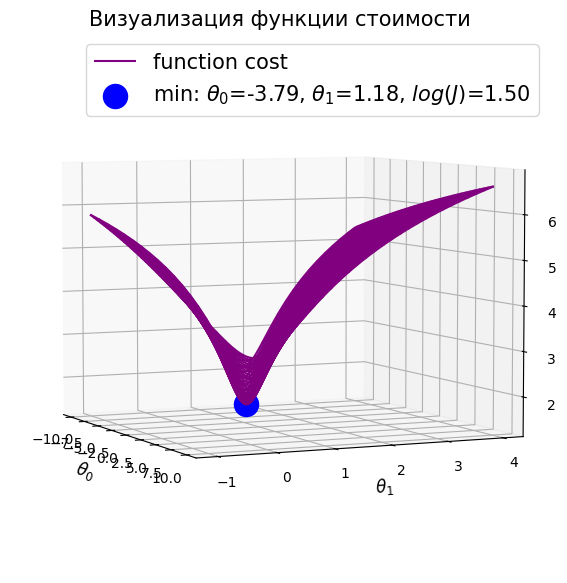

In [84]:
# %matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(5, 335)

# ax.plot_surface(ww0, ww1, np.log(sse), cmap=plt.cm.Spectral, rstride=3, cstride=3)
ax.plot_wireframe(ww0, ww1, np.log(sse), color = 'purple', rstride=3, cstride=3, antialiased=True, label = 'function cost' )

# точка - минимум
ax.scatter(min_theta_0, min_theta_1, np.log(min_J),
    color='blue', marker='o', s=300,
    label='min: $θ_0$=%0.2f, $θ_1$=%0.2f, $log(J)$=%0.2f' % (min_theta_0, min_theta_1, np.log(min_J)))

ax.set_xlabel('$θ_0$', fontsize=12)
ax.set_ylabel('$θ_1$', fontsize=12)
ax.set_zlabel('$log(J)$', fontsize=12)
plt.title('Визуализация функции стоимости', fontsize=15)
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.legend(fontsize=15)
plt.show()

In [ ]:
#Контурное представление
plt.figure(figsize=(9,7))
plt.contourf(ww0, ww1, np.log(sse))
# plt.contour(ww0, ww1, np.log(sse))
plt.scatter(min_theta_0, min_theta_1, s = 100, c='red', marker='o',
           label='min: $θ_0$=%0.2f, $θ_1$=%0.2f' % (min_theta_0, min_theta_1))
plt.xlabel('$θ_0$', fontsize=15)
plt.ylabel('$θ_1$', fontsize=15)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.legend(fontsize=20)
plt.show()

# Лабораторная работа 1.2
*********
## Линейная регрессия для нескольких переменных

In [5]:
data = pd.read_csv("cost_apartments.csv")

In [6]:
data.head()

,squera,number_rooms,price
0,42,2,4740000
1,54,2,5570000
2,73,4,7850000
3,67,3,7290000
4,45,2,4810000


## Задание 1: Нормализация признаков и приведение их к нулевому среднему

In [7]:
X = np.array(data[['squera','number_rooms']], dtype=float)
y = np.array(data['price'], dtype=float)
m = y.shape[0]

# Вывод на экран массива данных
print('Первые 10 элементов массива данных:')
print(X[:10])

Первые 10 элементов массива данных:
[[42.  2.]
 [54.  2.]
 [73.  4.]
 [67.  3.]
 [45.  2.]
 [59.  3.]
 [78.  4.]
 [47.  2.]
 [46.  2.]
 [51.  2.]]


In [8]:
def featureNormalize(X_norm):
  '''
  Инструкция:   Сначала, для каждого признака из набора данных вычислите
                его среднее значение и произведите его вычитание из набора данных,
                при этом среднее значение сохраните как mu. Далее, рассчитайте
                стандартное (среднеквадратическое) отклонение sigma
                для каждого признака и разделите X-mu на sigma.
                Заметим, что X представляет собой матрицу, в которой каждый
                столбец характеризует признак, а каждая строка - обучающий пример.
                Нормализацию данных следует производить отдельно для каждого
                признака
  '''
  mu = np.zeros((1, len(X[0])))
  sigma = np.zeros((1, len(X[0])))

  # находим среднее для каждого свойства
  for i in range(len(X[0])):
    mu[0][i] = np.average(X[:, i])

  # вычитаем среднее из соответствующего набора данных
  for i in range(len(X[0])):
    X[:, i] = [x - mu[0][i] for x in X[:, i]]

  # находим стандартное отклонение для каждого свойства
  for i in range(len(X[0])):
    sigma[0][i] = np.std(X[:, i])

  # делим значения набора данных на стандартное отклонение
  for i in range(len(X[0])):
    X[:, i] = [x / sigma[0][i] for x in X[:, i]]

  return X_norm, mu, sigma

In [9]:
X_norm, mu, sigma, = featureNormalize(X)
X = np.hstack((np.ones((m, 1)),X_norm))

In [10]:
X_norm[0:5]

array([[-1.56439751, -1.21191996],
       [-0.71191423, -1.21191996],
       [ 0.63785096,  1.21191996],
       [ 0.21160932,  0.        ],
       [-1.35127669, -1.21191996]])

## Задание 2: Метод градиентного спуска

computeCostMulti Рассчитывает значение весовой функции для задачи линейной регрессии с несколькими переменными (признаками). J = computeCostMulti(X, y, theta) значение весовой функции вычисляется в зависимости от параметра theta, т.е. параметра линейной регресии, обеспечивающего соответствие значений данных (тренировочного набора)X и y.

In [11]:
def computeCostMulti(X, y, theta):
  params_count = X.shape[1] # количество + 1 единичный столбец для theta0

  def hFunc(x, y):
    h = theta[0]
    for i in range(1, params_count):
      h += theta[i] * x[i]
    h -= y
    return pow(h, 2)

  m = y.shape[0]

  J = 0
  # TODO: Implement cost function
  J = (sum(map(hFunc, X, y))) / (2 * m)

  return J

gradientDescentMulti Определение значения theta методом градиентного спуска theta = gradientDescentMulti(x, y, theta, alpha, num_iters) производит переопределение theta в процессе выполнения num_iters итерационных шагов с параметром скорости обучения alpha

In [37]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
  cols = X.shape[1]

  def thetaFunc(x, y, z):
    h = theta[0]
    for i in range(1, cols):
      h += theta[i] * x[i]
    h -= y
    h *= z
    return h

  m = y.shape[0]
  J_history = []

  #Сохраняйте функцию стоимости на каждой итерации
  for i in range(num_iters):
    cost = computeCostMulti(X, y, theta)
    if(len(J_history) > 0 and cost > J_history[-1]):
      break
    J_history.append(cost)
    tmp_theta = []
    for j in range(cols):
      tmp = theta[j] - (alpha / m) * sum(map(thetaFunc, X, Y, X[:, j]))
      tmp_theta.append(tmp)
    for j in range(len(tmp_theta)):
      theta[j] = tmp_theta[j]


  print(theta)
  print(J_history)
  return theta, J_history

In [41]:
alpha = 0.01
num_iters = 1000
theta = np.zeros(3)
# Инициализация theta и нахождение локального экстремума (минимума)
# функции с помощью движения вдоль градиента (градиентный спуск)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
print('theta:\n {} \n {} \n {} \n'.format(theta[0], theta[1], theta[2]))
print('J_history первое и последнее значение функции\n {} \n {}'.format(J_history[0], J_history[-1]))

[7025734.97503467 1344879.96742191  468099.92793681]
[26388785847234.043, 25836640039367.26, 25296601617462.574, 24768386699858.195, 24251718699427.926, 23746328115388.13, 23251952331662.598, 22768335421582.105, 22295227958703.812, 21832386833543.047, 21379575076017.625, 20936561683411.777, 20503121453673.906, 20079034823868.74, 19664087713610.895, 19258071373313.188, 18860782237088.62, 18472021780151.016, 18091596380564.387, 17719317185196.75, 17354999979739.021, 16998465062654.52, 16649537122929.352, 16308045121498.604, 15973822176227.537, 15646705450331.205, 15326536044120.04, 15013158889962.969, 14706422650363.123, 14406179619045.21, 14112285624956.79, 13824599939089.375, 13542985184028.27, 13267307246143.508, 12997435190336.906, 12733241177263.572, 12474600382948.7, 12221390920723.385, 11973493765405.736, 11730792679656.098, 11493174142437.65, 11260527279515.9, 11032743795933.068, 10809717910395.227, 10591346291512.47, 10377527995834.123, 10168164407623.31, 9963159180316.68, 97624

In [42]:
print("%0.5f" % (computeCostMulti(X, y, theta)))

76979813930.94905


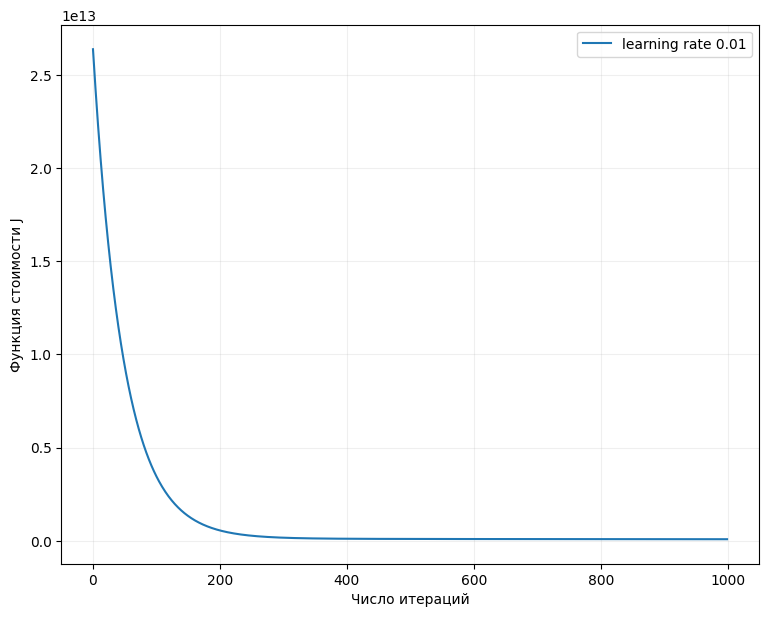

In [43]:
# Вывод на экран графика сходимости процесса
plt.figure(figsize=(9,7))
plt.plot(range(num_iters), J_history, label = "learning rate {:.2f}".format(alpha))
plt.xlabel('Число итераций')
plt.ylabel('Функция стоимости J')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [44]:
num_iters_test = 80
_ , J_history_1 = gradientDescentMulti(X_norm, y, np.zeros(3), 0.01, num_iters_test)
_ , J_history_2 = gradientDescentMulti(X_norm, y, np.zeros(3), 0.1, num_iters_test)
_ , J_history_3 = gradientDescentMulti(X_norm, y, np.zeros(3), 0.03, num_iters_test)
_ , J_history_4 = gradientDescentMulti(X_norm, y, np.zeros(3), 0.3, num_iters_test)

[1058915.10929535  935642.70521361       0.        ]
[26388785847234.043, 26233019002757.137, 26079254708529.703, 25927462101529.22, 25777610840509.76, 25629671096578.445, 25483613543949.496, 25339409350872.32, 25197030170730.504, 25056448133308.22, 24917635836220.863, 24780566336506.863, 24645213142377.312, 24511550205120.703, 24379551911159.42, 24249193074255.387, 24120448927861.746, 23993295117617.96, 23867707693985.355, 23743663105020.64, 23621138189284.54, 23500110168883.08, 23380556642638.895, 23262455579390.12, 23145785311414.31, 23030524527975.164, 22916652268989.492, 22804147918812.22, 22692991200137.21, 22583162168011.605, 22474641203961.414, 22367409010226.547, 22261446604102.777, 22156735312388.914, 22053256765936.918, 21950992894303.246, 21849925920499.25, 21750038355838.86, 21651312994881.67, 21553732910469.63, 21457281448855.418, 21361942224920.984, 21267699117484.293, 21174536264692.72, 21082438059501.426, 20991389145235.12, 20901374411231.473, 20812378988564.84, 207243

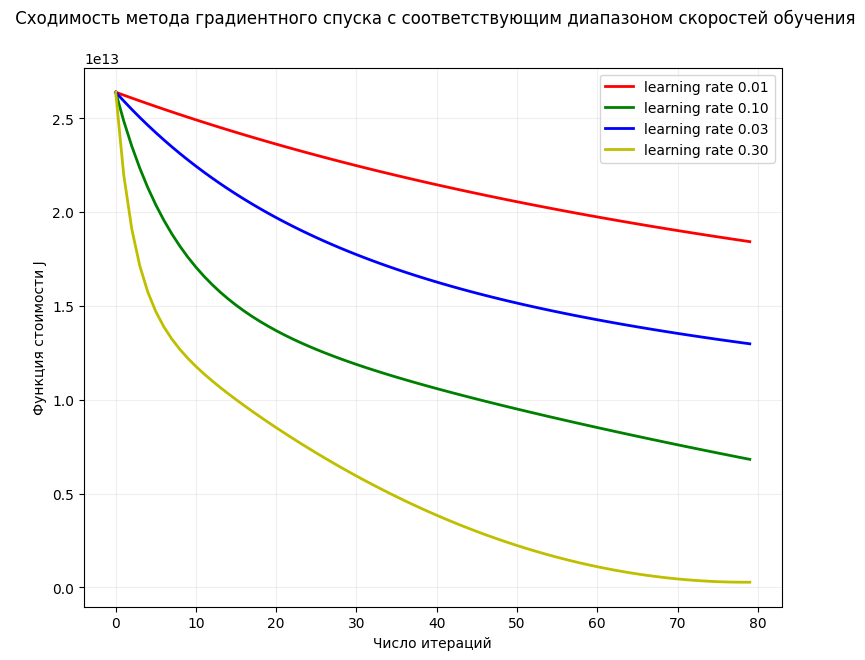

In [45]:
# Вывод на экран графика сходимости процесса
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Число итераций')
ax.set_ylabel('Функция стоимости J')
plt.title(' Сходимость метода градиентного спуска с соответствующим диапазоном скоростей обучения\n')
ax.plot(np.arange(len(J_history_1)), J_history_1, lw=2, c='r', label = "learning rate {:.2f}".format(0.01))
ax.plot(np.arange(len(J_history_2)), J_history_2, lw=2, c='g', label = "learning rate {:.2f}".format( 0.1))
ax.plot(np.arange(len(J_history_3)), J_history_3, lw=2, c='b', label = "learning rate {:.2f}".format(0.03))
ax.plot(np.arange(len(J_history_4)), J_history_4, lw=2, c='y', label = "learning rate {:.2f}".format( 0.3))
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Практическое задание: оценка стоимости трехкомнатной квартиры площадью 60 м2

In [34]:
in_x = np.array([1, 60, 3])
mu = [mu[0][0], mu[0][1]]
sigma = [sigma[0][0], sigma[0][1]]
norm_mu = np.concatenate([[0], mu], axis=0)
norm_sigma = np.concatenate([[1], sigma], axis=0)
norm_in_x = ((in_x - norm_mu)/norm_sigma).T
price = np.dot((theta.T), norm_in_x)

print('Стоимость трехкомнатной квартиры площадью 60 м2 оцененная методом')
print(f'градиентного спуска составляет: {price} рублей\n')

Стоимость трехкомнатной квартиры площадью 60 м2 оцененная методом
градиентного спуска составляет: 6641539.633655074 рублей



## Задание 3: Система нормальных уравнений

In [105]:
X = np.array(data[['squera','number_rooms']], dtype=float)
y = np.array(data['price'], dtype=float)
m = y.shape[0]
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print(X[0:5])

[[ 1. 42.  2.]
 [ 1. 54.  2.]
 [ 1. 73.  4.]
 [ 1. 67.  3.]
 [ 1. 45.  2.]]


Замкнутая форма для линейной регрессии записывается как:: $$ w = (X^TX)^{-1}X^Ty $$
Использование этой формулы не требует нормализации свойств. Точный результат достигается без использования итераций: нет цикла как в градиентном спуске. Завершите код в normalEqn используя приведённую формулу, для вычисления $θ$. Здесь не требуется нормализация, однако это не значит, что не нужно добавить единичный столбец (учёт $θ_0$) к $X$

In [106]:
from numpy import linalg
def normalEqn(X, y):
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y)
    return theta

Расчет параметров theta решением системы нормальных уравнений

In [107]:
theta_sisteam = normalEqn(X, y)
print("Значение theta, полученное с помощью системы нормальных уравнений: ")
print(*theta_sisteam, sep='\n')

Значение theta, полученное с помощью системы нормальных уравнений: 
-1222144.9103824352
128996.20744997084
-3439.5562339224853


Используйте этот метод для оценки стоимости трехкомнатной квартиры площадью 60 м2, методом наименьших квадратов. Можете использовать предыдущее задание с использованием метода градиентного спуска для проверки (должно получиться сходное число).

In [110]:
in_x_new = np.array([1, 60, 3])
price_sistem = in_x_new.dot(theta_sisteam)
print('Стоимость трехкомнатной квартиры площадью 60 м2, оцененная методом наименьших квадратов составляет: {0} рублей'.format(price_sistem))

Стоимость трехкомнатной квартиры площадью 60 м2, оцененная методом наименьших квадратов составляет: 6507308.867914047 рублей
